<a href="https://colab.research.google.com/github/SMKProj/SentimentAnalysis/blob/main/SentimentAanlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('UScomments.csv',error_bad_lines=False, engine='python')

<ipython-input-14-10548ac3c11b>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('UScomments.csv',error_bad_lines=False, engine='python')
Skipping line 24537: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 41589: ',' expected after '"'
Skipping line 74586: ',' expected after '"'
Skipping line 114465: ',' expected after '"'
Skipping line 141800: ',' expected after '"'
Skipping line 142496: ',' expected after '"'
Skipping line 162506: ',' expected after '"'
Skipping line 189732: ',' expected after '"'
Skipping line 195584: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead
Skipping line 216199: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please 

In [15]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [16]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
!pip install textblob

In [10]:
from textblob import TextBlob

In [19]:
len(df['comment_text'])

691350

In [20]:
df['comment_text'][0]

"Logan Paul it's yo big day ‼️‼️‼️"

In [21]:
polarity = []
for comments in df['comment_text']:
  polarity.append(TextBlob(comments).sentiment.polarity)




In [22]:
df['polarity'] = polarity
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [23]:
mostpc = df['polarity'] == 1.0
lesspc = (df['polarity']>=0.0) & (df['polarity'] < 1.0)
mostnc = df['polarity'] == -1.0
lessnc = (df['polarity']>-1.0) & (df['polarity'] < 0.0)

In [24]:
a = len(df[mostpc])
b = len(df[lesspc])
c = len(df[mostnc])
d = len(df[lessnc])
print(a+b+c+d)

691350


In [25]:
most_positive_comments = df[mostpc]
less_positive_comments = df[lesspc]
most_negative_comments = df[mostnc]
less_negative_comments = df[lessnc]

In [26]:
!pip install wordcloud

In [27]:
from wordcloud import WordCloud, STOPWORDS

In [28]:
most_pos_com = ' '.join(most_positive_comments['comment_text'])
less_pos_com = ' '.join(less_positive_comments['comment_text'])
most_neg_com = ' '.join(most_negative_comments['comment_text'])
less_neg_com = ' '.join(less_negative_comments['comment_text'])

In [29]:
most_pos_wc = WordCloud(stopwords=set(STOPWORDS)).generate(most_pos_com)
less_pos_wc = WordCloud(stopwords=set(STOPWORDS)).generate(less_pos_com)
most_neg_wc = WordCloud(stopwords=set(STOPWORDS)).generate(most_neg_com)
less_neg_wc = WordCloud(stopwords=set(STOPWORDS)).generate(less_neg_com)

(-0.5, 399.5, 199.5, -0.5)

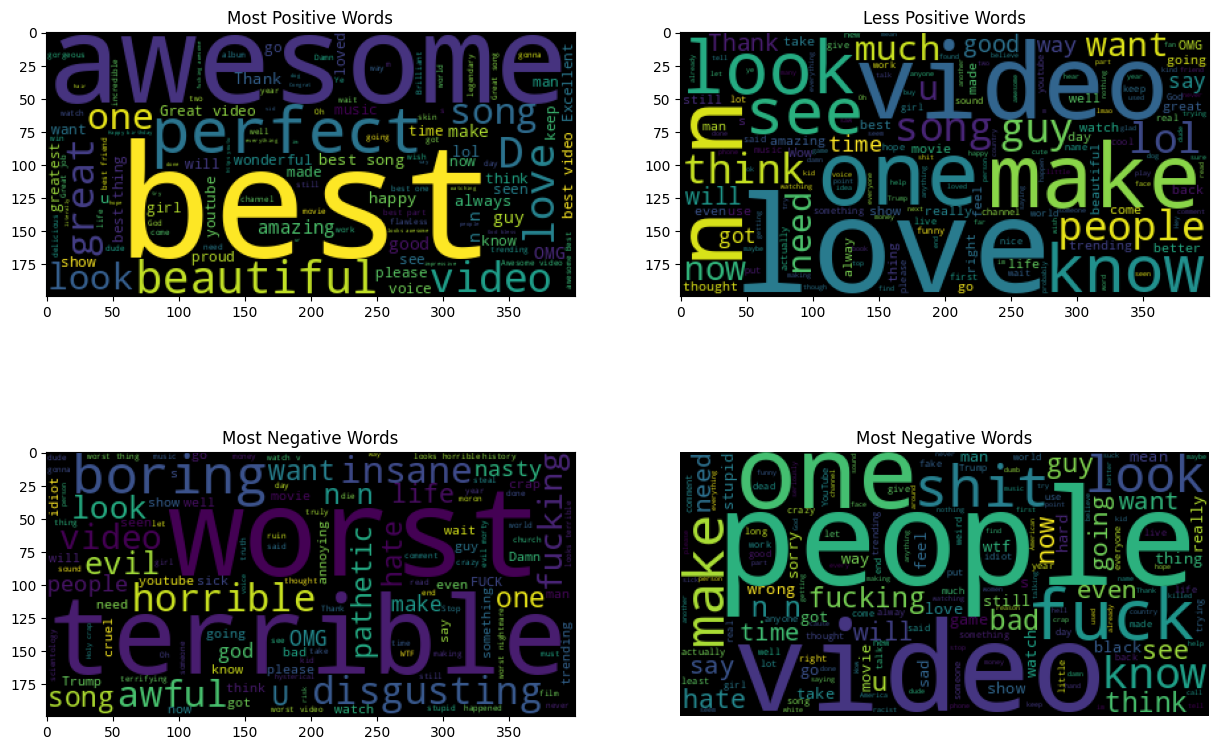

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Most Positive Words')
plt.imshow(most_pos_wc)
plt.subplot(2,2,2)
plt.title('Less Positive Words')
plt.imshow(less_pos_wc)
plt.subplot(2,2,3)
plt.title('Most Negative Words')
plt.imshow(most_neg_wc)
plt.subplot(2,2,4)
plt.title('Most Negative Words')
plt.imshow(less_neg_wc)
plt.axis('off')

EMOJI Analysis

In [31]:
!pip install emoji==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=2c0dab15d5704e51490d55992356d099648fd7627f9730f113e7f0991f9f33ca
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [32]:
import emoji

In [33]:
emojiList=[]
for c in df['comment_text']:
  for e in c:
     if e in emoji.EMOJI_DATA:
      emojiList.append(e)

In [34]:
len(emojiList)

294548

In [35]:
from collections import Counter

In [36]:
emojis = []
popularity = []
for r in (range(10)):
  emojis.append(Counter(emojiList).most_common(10)[r][0])
  popularity.append(Counter(emojiList).most_common(10)[r][1])

In [37]:
import plotly.graph_objs as go
from plotly.offline import iplot


In [38]:
trace = go.Bar(x = emojis,y= popularity)
iplot([trace])